In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
diwali_df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [9]:
diwali_df.shape

(11251, 15)

In [10]:
diwali_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


There are two columns which has all the values null and columns are not useful for our analysis so we remove both the columns. and 
in `amount` column there is some null values we also have to remove the null values.

In [11]:
diwali_df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [12]:
pd.isnull(diwali_df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [13]:
diwali_df.dropna(inplace=True)

In [14]:
# Change data type to int
diwali_df['Amount'] = diwali_df['Amount'].astype('int')

In [15]:
# Let's use describe() method for specific columns to get some useful information
diwali_df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

In [16]:
diwali_df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

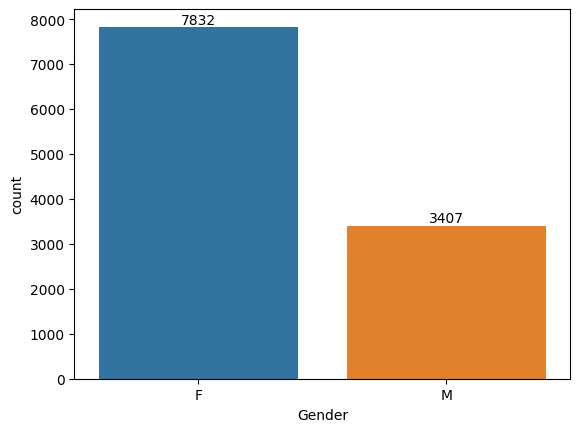

In [17]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = diwali_df)

for bars in ax.containers:
    ax.bar_label(bars)

In [18]:
sales_gen = diwali_df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

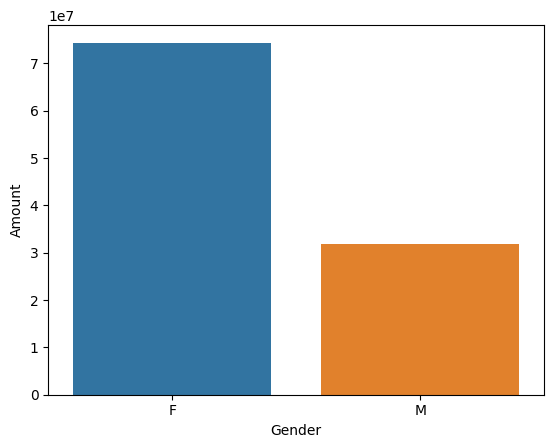

In [19]:
# plotting a bar chart for gender vs total amount

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen);

**From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men**

### Age

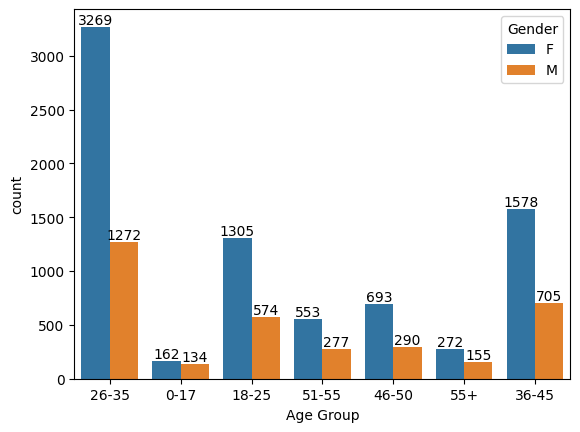

In [20]:
ax2 = sns.countplot(data = diwali_df, x='Age Group', hue='Gender');
for bars in ax2.containers:
    ax2.bar_label(bars)

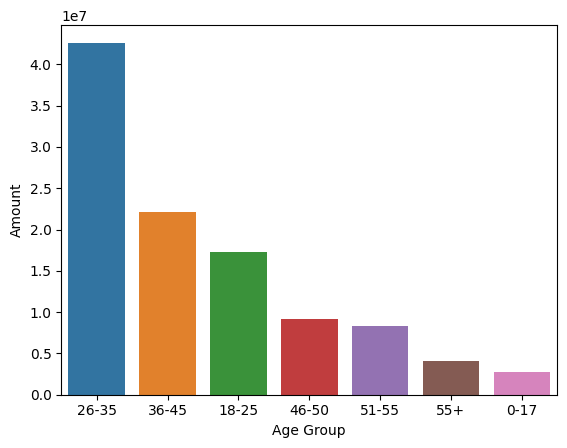

In [21]:
# Total amount vs Age Group
sales = diwali_df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False)
sns.barplot(x = 'Age Group', y = 'Amount',data=sales);

**From the graphs we can see that most of the buyers are of age-group 26-35 years primarily females.**

### State

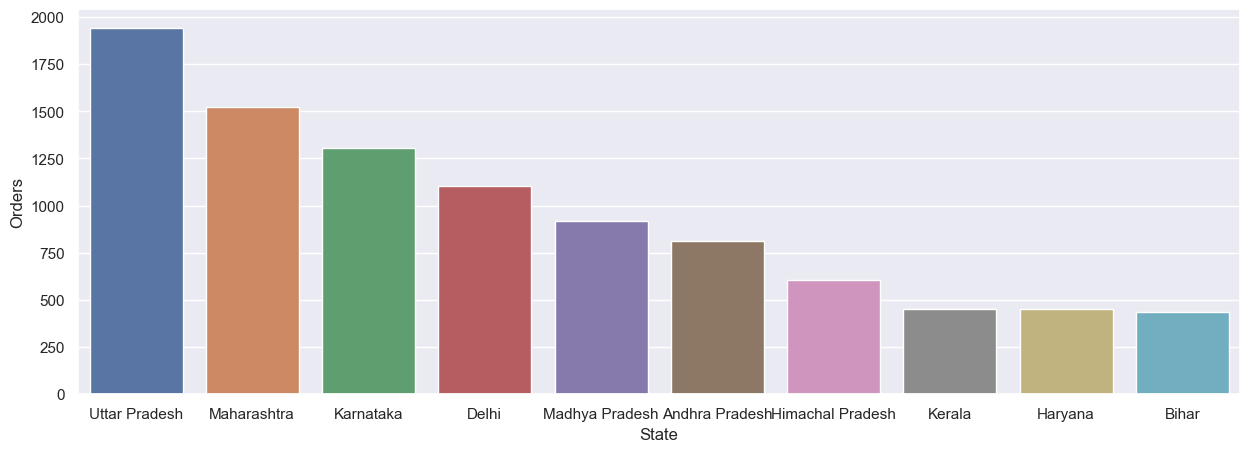

In [22]:
# Total number of orders from top 10 states
top_states = diwali_df.groupby(['State'],as_index=False)['Orders'].count().sort_values(by = 'Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State', y= 'Orders', data=top_states);

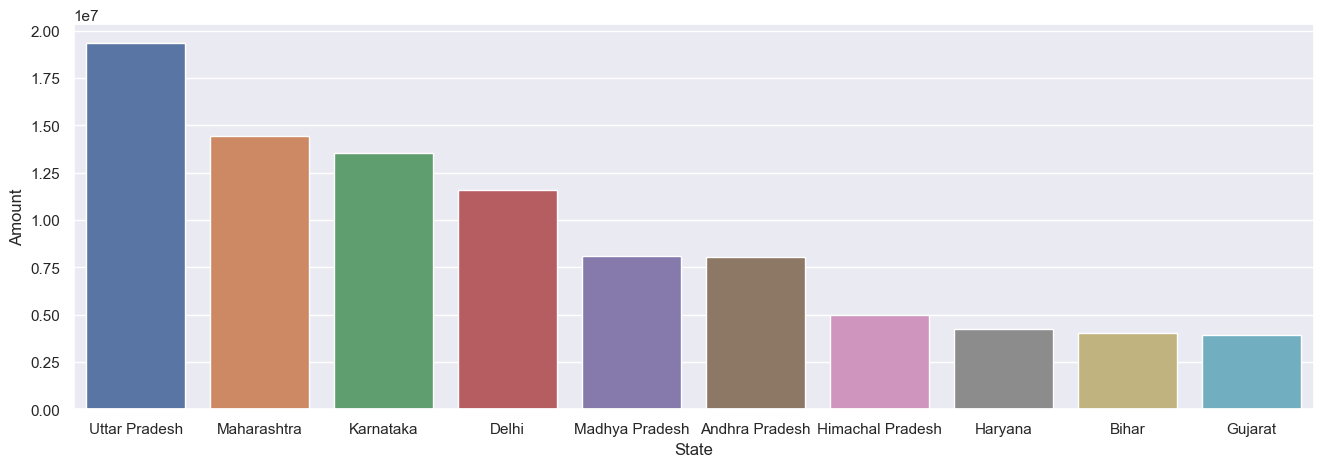

In [23]:
# Total amount/sales from top 10 states
sales_state = diwali_df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(x='State', y='Amount', data=sales_state);

**From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively.**

### Marital Status

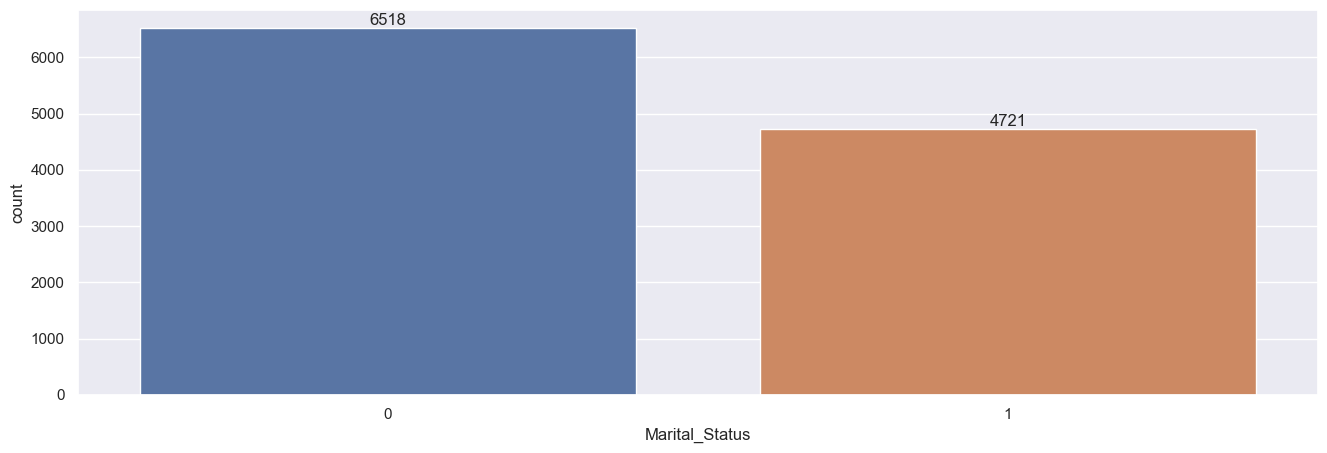

In [24]:
ax = sns.countplot(data=diwali_df, x='Marital_Status')
sns.set(rc={'figure.figsize':(6,5)})
for bars in ax.containers:
    ax.bar_label(bars)

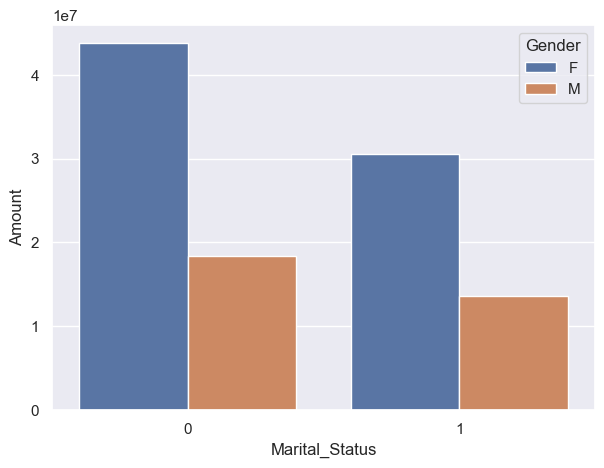

In [25]:
sale_state = diwali_df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(data=sale_state,x= 'Marital_Status',y='Amount',hue='Gender');

**From above graphs we can see that most of the buyers are `married (women)` and they have purchased more than others.**

### Occupation

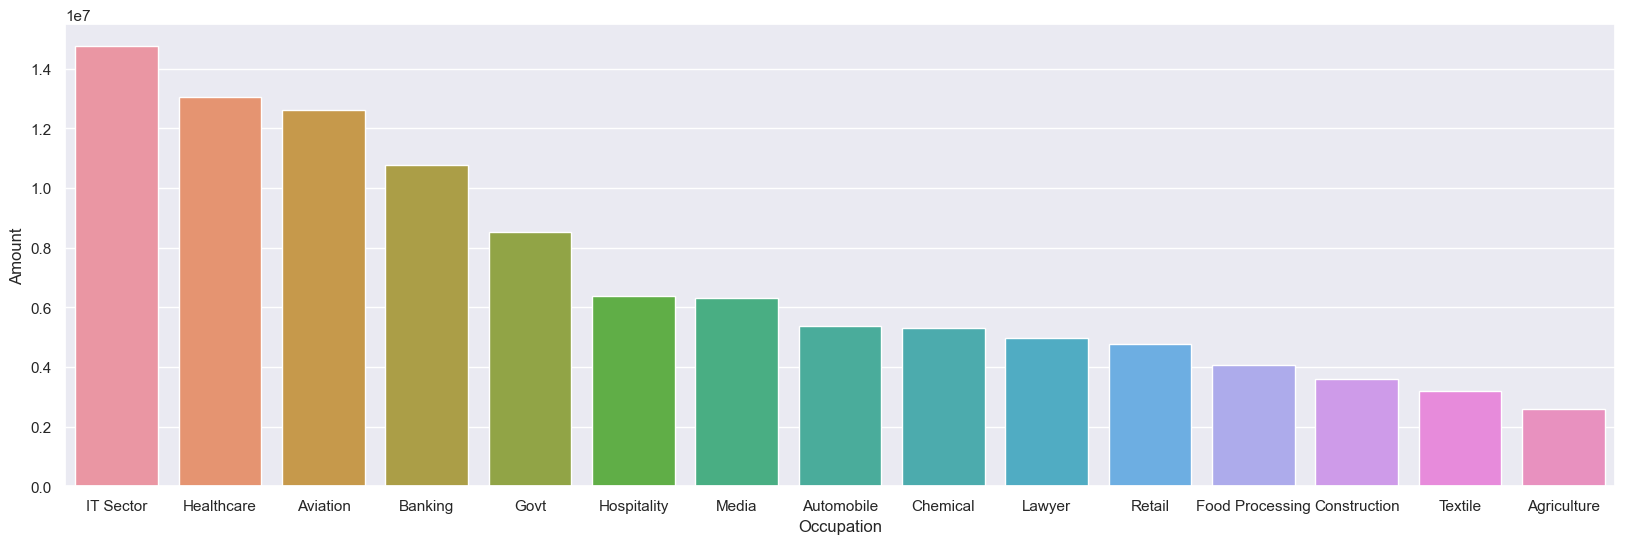

In [26]:
# Total buyers occupation wise
sales_occupation = diwali_df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(20,6)})
sns.barplot(data=sales_occupation,x='Occupation',y='Amount');

 **From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector.**

### Product Category

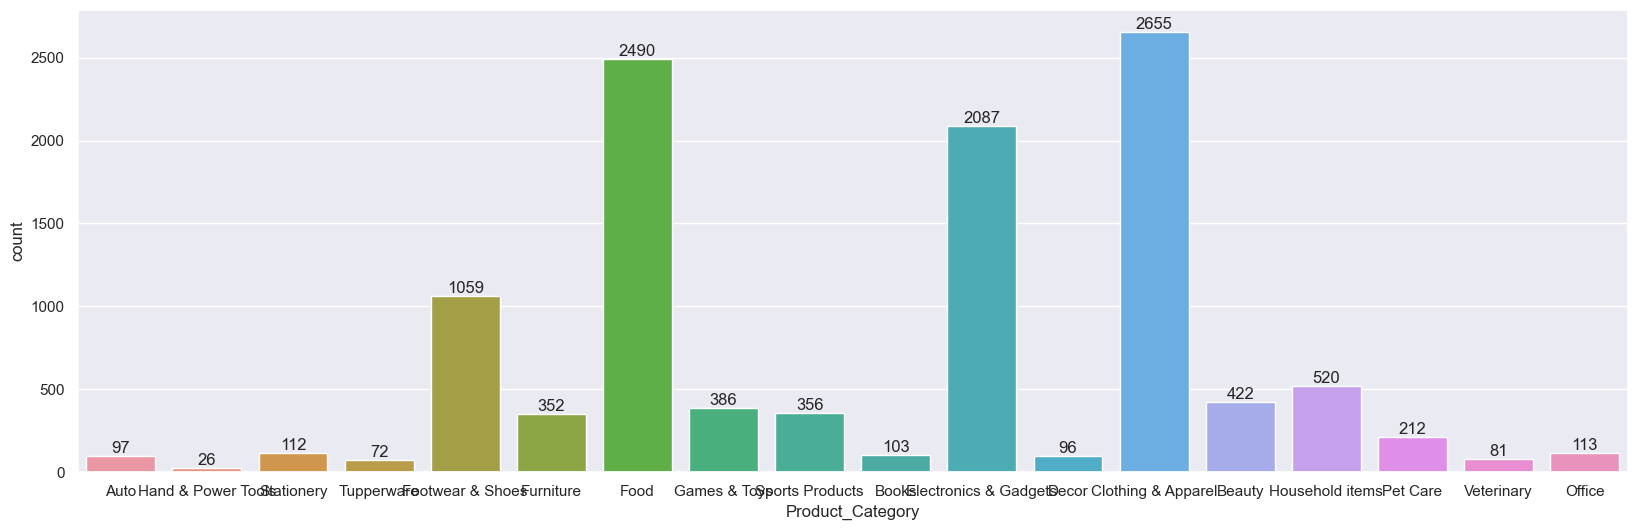

In [27]:
sns.set(rc={'figure.figsize':(20,6)})
ax4 = sns.countplot(data=diwali_df,x= 'Product_Category');
for bars in ax4.containers:
    ax4.bar_label(bars)

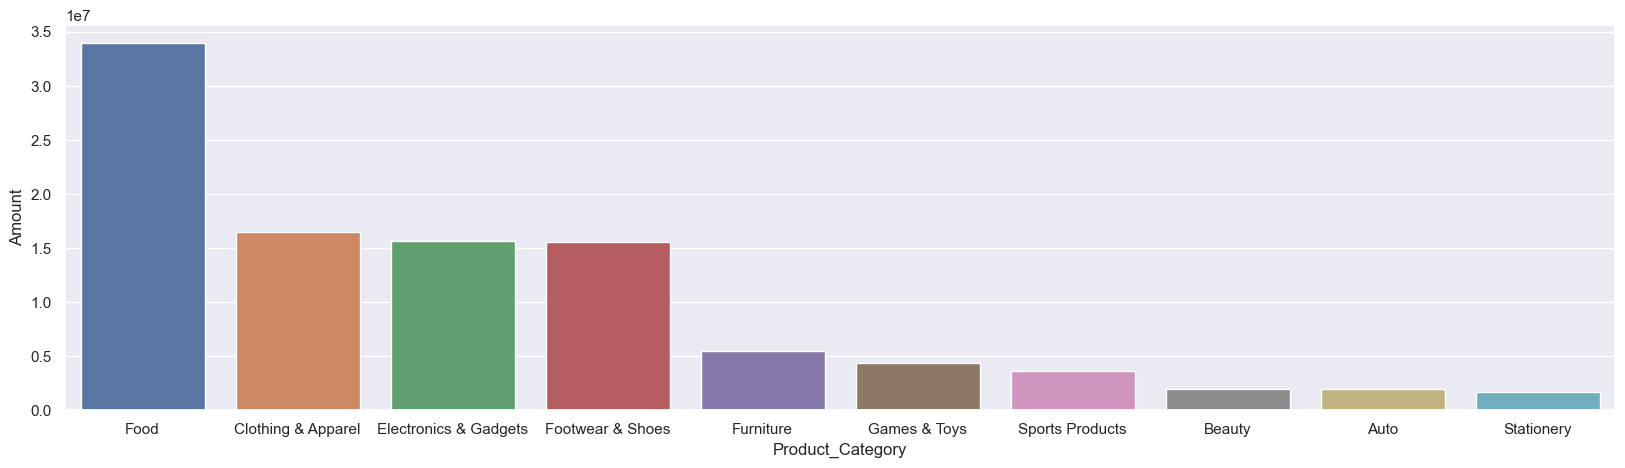

In [28]:
prod_category = diwali_df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=prod_category,x='Product_Category',y='Amount');

**From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category.**

In [29]:
diwali_df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

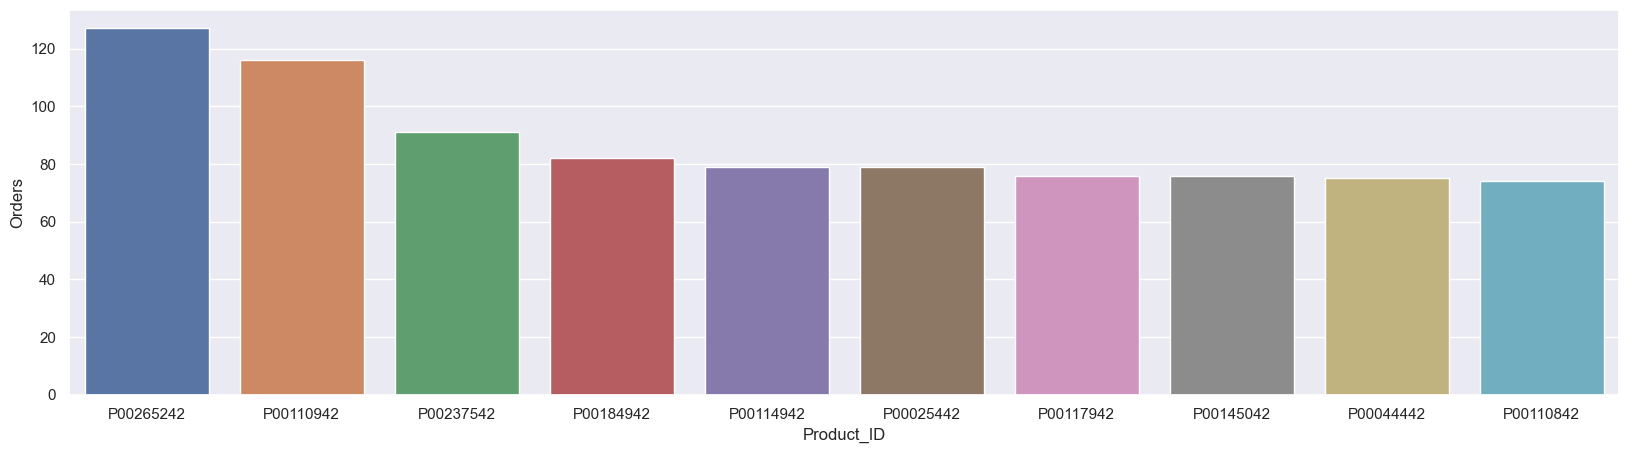

In [30]:
# Top 10 selling product
sell_prod = diwali_df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.barplot(data=sell_prod,x='Product_ID',y='Orders');

### Conclusion:

**Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from the respective category like Food, Clothing and Electronics & Gadgets**